# Capstone: Bitcoin: Time Series Forecasting Using Machine Learning

## 3. Modeling
---

We performed a vanilla Linear Regression to see performance and coefficients and Extra Trees to extract feature importance.

## Imports
---

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

# Supress warnings
import warnings
warnings.filterwarnings('ignore')

# Scikit Learn
import sklearn
sklearn.set_config(display='diagram')
from sklearn.preprocessing import StandardScaler, PowerTransformer, OneHotEncoder, PolynomialFeatures
from sklearn.model_selection import cross_val_score, train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet  
from sklearn.metrics import mean_squared_error, mean_absolute_error, plot_confusion_matrix
from sklearn.dummy import DummyRegressor
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_selector, make_column_transformer
from sklearn.feature_selection import SelectKBest, f_regression

sns.set_style()
pd.set_option('display.max_columns', None)
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (16, 9)

from IPython import get_ipython
ipython = get_ipython()

if 'ipython' in globals():
    ipython.magic('matplotlib inline')
    
import _pickle as pickle

import datetime
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import ExtraTreesClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, r2_score, mean_squared_error, explained_variance_score, recall_score, precision_score, confusion_matrix

In [2]:
with open("exog_bitcoin.pickle",'rb') as fp:
    df = pickle.load(fp)

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 94606 entries, 2010-01-01 00:00:00 to 2020-11-18 21:50:00
Columns: 108 entries, market_mvrv_more_155 to day_of_week
dtypes: float64(104), int64(4)
memory usage: 78.7 MB


In [4]:
df.head()

,market_mvrv_more_155,ma128,ma14,ma200,ma25,ma40,ma60,ma9,ma90,addresses_accumulation_balance,supply_current_adjusted,addresses_new_non_zero_count,mining_revenue_sum,indicators_sopr_account_based,indicators_sopr_adjusted,transactions_rate,market_mvrv,addresses_accumulation_count,distribution_herfindahl,entities_receiving_count,market_marketcap_usd,distribution_gini,mining_marketcap_thermocap_ratio,blockchain_block_interval_mean,indicators_nvts,mining_hash_rate_mean,blockchain_utxo_spent_count,transactions_transfers_volume_from_exchanges_sum,addresses_min_1k_count,supply_active_more_1y_percent,transactions_transfers_volume_to_exchanges_sum,indicators_puell_multiple,transactions_transfers_volume_entity_adjusted_sum,transactions_transfers_volume_exchanges_net,transactions_transfers_from_exchanges_count,blockchain_block_size_mean,entities_net_growth_count,indicators_sopr_more_155,blockchain_block_count,supply_profit_relative,market_price_drawdown_relative,entities_min_1k_count,transactions_transfers_volume_miners_to_exchanges,market_price_realized_usd,market_mvrv_less_155,indicators_net_unrealized_profit_loss_account_based,Close,High,Low,Open,daysTillHalving,indicators_s2f_ratio,blockchain_utxo_created_count,transactions_transfers_volume_adjusted_sum,mining_revenue_from_fees,blockchain_utxo_created_value_sum,indicators_hodled_lost_coins,supply_active_more_3y_percent,blockchain_utxo_spent_value_sum,distribution_balance_1pct_holders,fees_volume_sum,indicators_sopr,addresses_profit_relative,entities_new_count,market_mvrv_z_score,indicators_mvrv_account_based,transactions_size_sum,entities_profit_relative,transactions_transfers_volume_miners_net,crossed,ma30,market_price_usd_close,indicators_nupl_more_155_account_based,indicators_liveliness,indicators_liveliness_account_based,blockchain_utxo_profit_relative,transactions_entity_adjusted_count,mining_volume_mined_sum,transactions_count,addresses_min_10k_count,mining_miners_outflow_multiple,indicators_reserve_risk,blockchain_block_height,mining_miners_unspent_supply,indicators_realized_profit,addresses_count,supply_inflation_rate,indicators_difficulty_ribbon_compression,indicators_nupl_more_155,mining_thermocap,addresses_sending_to_exchanges_count,addresses_active_count,distribution_balance_exchanges,market_marketcap_realized_usd,fees_volume_mean,mining_difficulty_latest,addresses_non_zero_count,indicators_nvt,entities_active_count,indicators_net_unrealized_profit_loss,addresses_receiving_from_exchanges_count,supply_current,transactions_transfers_to_exchanges_count,indicators_sopr_less_155,month,week,day,day_of_week
t,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2010-01-01,4.849526,4.313379e+09,4.463299e+09,4.306751e+09,4.389233e+09,4.353883e+09,2.169753e+09,4.556816e+09,4.321152e+09,70018.15,1631100.0,134.0,6600.0,1.216472,1.0,0.000023,1.0,8.0,0.004223,2.0,170264.89,0.323941,3.779248e-07,854.090909,76.248952,5.948447e+06,2.0,0.0,9.0,0.00000,0.0075,3.65633,6700.00,0.0075,0.0,217.954545,48.0,2.744538,132.0,0.999025,0.0,92.0,7.082432,0.04951,1.0,0.421777,0.04951,0.04951,0.04951,0.04951,1061.0,0.006671,134.0,100.00,0.0,6700.00,1.616534e+06,0.0,100.00,0.326525,0.0,1.0,0.999387,50.0,1.035709,1.276953,316.0,0.99744,6500.0,0.0,6.672973e+06,0.04951,0.423229,0.008960,0.009140,0.99927,134.0,6600.0,2.0,4.0,2.817629,1.132036,32622.0,1493402.74,0.0,32745.0,3.366197,0.018816,0.793794,170820.081484,0.0,4.0,0.0075,80758.2365,0.0,5.080515e+09,29959.0,95.861836,4.0,0.421756,0.0,1631150.0,1.0,1.325994,1,53,1,4
2010-01-02,4.849526,4.319516e+09,4.519409e+09,4.310678e+09,4.420655e+09,4.373522e+09,2.176318e+09,4.644100e+09,4.329881e+09,70018.15,1637400.0,126.0,6300.0,1.216472,1.0,0.000000,1.0,8.0,0.004215,0.0,170264.89,0.325387,3.779248e-07,963.500000,76.248952,5.272979e+06,0.0,0.0,9.0,0.00000,0.0075,3.65633,6300.00,0.0075,0.0,215.626984,37.0,2.744538,126.0,0.999025,0.0,96.0,7.082432,0.04951,1.0,0.421777,0.04951,0.04951,0.04951,0.04951,1061.0,0.006

In [5]:
((df.isnull().sum())/len(df)*100).sort_values(ascending = False)

day_of_week                                       0.0
supply_profit_relative                            0.0
addresses_min_1k_count                            0.0
supply_active_more_1y_percent                     0.0
transactions_transfers_volume_to_exchanges_sum    0.0
                                                 ... 
blockchain_utxo_profit_relative                   0.0
transactions_entity_adjusted_count                0.0
mining_volume_mined_sum                           0.0
transactions_count                                0.0
market_mvrv_more_155                              0.0
Length: 108, dtype: float64

In [6]:
df.shape

(94606, 108)

In [7]:
market_cols = [col for col in df.columns if 'market' in col]
market_cols

['market_mvrv_more_155',
 'market_mvrv',
 'market_marketcap_usd',
 'mining_marketcap_thermocap_ratio',
 'market_price_drawdown_relative',
 'market_price_realized_usd',
 'market_mvrv_less_155',
 'market_mvrv_z_score',
 'market_price_usd_close',
 'market_marketcap_realized_usd']

In [8]:
X = df.drop(columns = market_cols)
y = df['market_price_realized_usd']

In [9]:
X.columns

Index(['ma128', 'ma14', 'ma200', 'ma25', 'ma40', 'ma60', 'ma9', 'ma90',
       'addresses_accumulation_balance', 'supply_current_adjusted',
       'addresses_new_non_zero_count', 'mining_revenue_sum',
       'indicators_sopr_account_based', 'indicators_sopr_adjusted',
       'transactions_rate', 'addresses_accumulation_count',
       'distribution_herfindahl', 'entities_receiving_count',
       'distribution_gini', 'blockchain_block_interval_mean',
       'indicators_nvts', 'mining_hash_rate_mean',
       'blockchain_utxo_spent_count',
       'transactions_transfers_volume_from_exchanges_sum',
       'addresses_min_1k_count', 'supply_active_more_1y_percent',
       'transactions_transfers_volume_to_exchanges_sum',
       'indicators_puell_multiple',
       'transactions_transfers_volume_entity_adjusted_sum',
       'transactions_transfers_volume_exchanges_net',
       'transactions_transfers_from_exchanges_count',
       'blockchain_block_size_mean', 'entities_net_growth_count',
      

In [10]:
X.shape

(94606, 98)

In [11]:
y.shape

(94606,)

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [13]:
scaler = StandardScaler()

In [14]:
lr = LinearRegression()

In [15]:
lr.fit(X_train, y_train)

LinearRegression()

In [16]:
lr.score(X_train, y_train)

0.9661598197355334

In [17]:
lr.score(X_test, y_test)

0.9663241980353409

In [18]:
lr.coef_

array([ 9.75288702e-20,  5.31352242e-20, -1.75357890e-19,  2.43475213e-20,
        1.45901361e-20,  2.79375163e-20, -5.17945463e-20, -7.30859903e-20,
        6.42590021e-08,  6.75489195e-07, -2.03613747e-08, -7.51701640e-10,
       -7.23585286e-10,  1.71287424e-10, -1.14067745e-13,  4.53996430e-08,
       -3.44953990e-16, -1.02303310e-08,  1.16769427e-14, -7.63086200e-12,
        6.80669127e-12,  1.33087361e-17, -3.82490203e-08, -1.61973529e-08,
       -3.71823993e-11, -4.28645523e-14, -1.34805180e-08, -1.32817792e-13,
       -4.17683334e-08,  2.71683496e-09, -7.67314293e-09, -1.00095705e-07,
        4.71995410e-10, -9.05046486e-13,  6.29198847e-13,  3.14964109e-14,
        3.55790471e-11, -9.40015561e-11, -1.98123464e-13,  1.69686780e-09,
        1.69660202e-09,  1.70516130e-09,  1.70577564e-09,  1.47436252e-10,
       -5.48409434e-09, -1.64312335e-07,  6.27974118e-08, -5.04831549e-14,
       -8.21969020e-07,  2.01428172e-07,  1.66382191e-14, -8.21184350e-07,
        3.59321727e-14, -

Now, let’s build a really simple naive model. We’ll have our model read in the previous day’s open and close prices and then predict the following day’s price.
When we split the data up, we need to make sure that we don’t shuffle it (as is the default in scikit-learn). The problem with doing that is we’ll mix past and future information.

In [19]:
targets = df['Open'].shift(periods=-1).fillna(0).values
features = df[['Open','Close']].values

In [20]:
X_train,X_test, y_train,y_test = train_test_split(features,targets,
                                                  test_size=0.1,shuffle=False,random_state=42)
model = LinearRegression()
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

[9366.32652579 9368.26526496 9346.48275412 9340.86427973 9340.86427973
 9327.94435459 9346.99799952 9355.23502887 9332.62834088 9358.94985729]
[9377.99118857 9368.83009062 9357.53396618 9347.35507744 9349.1040893
 9331.72513905 9332.58958441 9351.47789815 9341.28441752 9343.44669867]
R2: 0.991856
MSE: 36905.004996
EV: 0.991857


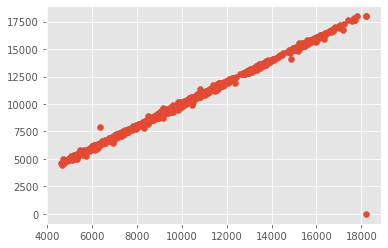

In [21]:
print(y_test[0:10])
print(y_preds[0:10])
print("R2: %f" % r2_score(y_test,y_preds))
print("MSE: %f" % mean_squared_error(y_test,y_preds))
print("EV: %f" % explained_variance_score(y_test,y_preds))

plt.scatter(y_preds,
            y_test)
plt.show()

In [22]:
# Shift to Binary Classification Problem

There’s an implicit assumption we’re making here. We’re assuming that we want to know the approximate price for the next day, but that’s not the case.
Instead, we want a model that tells us if the price will go up or down the next day. Given that the cost to borrow capital for one day is basically free (especially in this environment), we could, theoretically, borrow infinite sums of cash. So how much it changes is not important, just that we know how it changes (e.g. to short if it goes down and buy if it goes up).
Because we moved from a regression to a binary classification problem, we’ll need to switch models to LinearRegression's close cousin LogisticRegression. This will also necesitate changing the metrics we use.

In [23]:
df['target'] = df['Open'].shift(periods=-1)
targets = df.apply(lambda x: 1 if x['target']-x['Close'] > 0 else 0,axis=1).values
features = df[['Open','Close']].values

In [24]:
X_train,X_test, y_train,y_test = train_test_split(features,targets,test_size=0.1,shuffle=False,random_state=42)
model = LogisticRegression(solver='lbfgs',n_jobs=-1)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [25]:
print(y_test[0:10])
print(y_preds[0:10])
print("Acc: %f" % accuracy_score(y_test,y_preds))
print("Recall: %f" % recall_score(y_test,y_preds))
print("Precision: %f" % precision_score(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

[1 0 0 0 0 1 1 0 1 1]
[0 0 0 0 0 0 0 0 0 0]
Acc: 0.509248
Recall: 0.218690
Precision: 0.519115
[[3786  956]
 [3687 1032]]


In [26]:
# plot_confusion_matrix(model, X_test, y_test)

In [27]:
vals,counts = np.unique(y_test,return_counts=True)
print((vals,counts))
print("Baseline: %0.3f" % (counts[0]/(counts[0]+counts[1])))

(array([0, 1]), array([4742, 4719]))
Baseline: 0.501


In [28]:
# With more features

In [29]:
exogenous_features = [i for i in df.columns]

In [30]:
targets = df.apply(lambda x: 1 if x['target']-x['Close'] > 0 else 0,axis=1).values
features = df[exogenous_features].fillna(0).values

In [31]:
X_train,X_test, y_train,y_test = train_test_split(features,targets,test_size=0.1,shuffle=False,random_state=42)

In [32]:
model = LogisticRegression(solver='lbfgs',n_jobs=-1)
model.fit(X_train,y_train)
y_preds = model.predict(X_test)

In [33]:
print(y_test[0:10])
print(y_preds[0:10])
print("Acc: %f" % accuracy_score(y_test,y_preds))
print("Recall: %f" % recall_score(y_test,y_preds))
print("Precision: %f" % precision_score(y_test,y_preds))
print(confusion_matrix(y_test,y_preds))

[1 0 0 0 0 1 1 0 1 1]
[0 0 0 0 0 0 0 0 0 0]
Acc: 0.504175
Recall: 0.304937
Precision: 0.504912
[[3331 1411]
 [3280 1439]]


In [34]:
final_df = df[exogenous_features]
final_df['target'] = final_df['Open'].shift(periods=-1)
final_df['target'] = final_df.apply(lambda x: 1 if x['target']-x['Close'] > 0 else 0,axis=1)
final_df = final_df[1:]  # we ignore the first value

In [35]:
# prep up data
feature_names = final_df.loc[:, final_df.columns != 'target'].columns.values
X,y = final_df.loc[:, final_df.columns != 'target'].values, final_df['target'].values
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size=0.3,shuffle=False,random_state=42)

In [36]:
# Credit to <https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html>
model = ExtraTreesClassifier(n_estimators=100, random_state=42, n_jobs=6)
model.fit(X_train,y_train)
importances = model.feature_importances_
std = np.std([tree.feature_importances_ for tree in model.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]
print("Feature ranking:")
for f in range(X.shape[1]):
    print("%d. feature '%s' (%f)" % (indices[f], 
                                   feature_names[indices[f]], 
                                   importances[indices[f]]))

Feature ranking:
71. feature 'market_price_usd_close' (0.174021)
46. feature 'Close' (0.173838)
48. feature 'Low' (0.168908)
47. feature 'High' (0.168436)
49. feature 'Open' (0.168104)
107. feature 'day_of_week' (0.011380)
106. feature 'day' (0.010824)
21. feature 'distribution_gini' (0.005206)
74. feature 'indicators_liveliness_account_based' (0.004525)
59. feature 'distribution_balance_1pct_holders' (0.004495)
73. feature 'indicators_liveliness' (0.004083)
9. feature 'addresses_accumulation_balance' (0.004046)
101. feature 'supply_current' (0.003880)
82. feature 'blockchain_block_height' (0.003734)
83. feature 'mining_miners_unspent_supply' (0.002997)
19. feature 'entities_receiving_count' (0.002787)
79. feature 'addresses_min_10k_count' (0.002330)
17. feature 'addresses_accumulation_count' (0.002260)
93. feature 'market_marketcap_realized_usd' (0.002192)
43. feature 'market_price_realized_usd' (0.001876)
98. feature 'entities_active_count' (0.001862)
96. feature 'addresses_non_zero_

In [37]:
range(X.shape[1])

range(0, 108)

In [38]:
indices[:15]

array([ 71,  46,  48,  47,  49, 107, 106,  21,  74,  59,  73,   9, 101,
        82,  83])

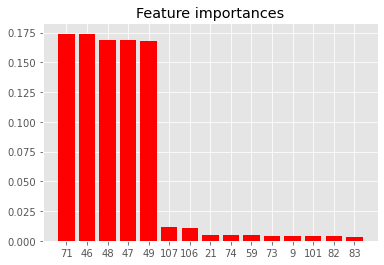

In [39]:
plt.figure()
plt.title("Feature importances")
plt.bar(range(15), importances[indices[:15]],
       color="r", align="center",)
plt.xticks(range(15), indices[:15])
# plt.xlim([-1, X.shape[1]])
plt.show()